# Herencia
## Herencia multiple

### Ejemplo: El problema del diamante (Herencia híbrida)
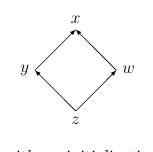

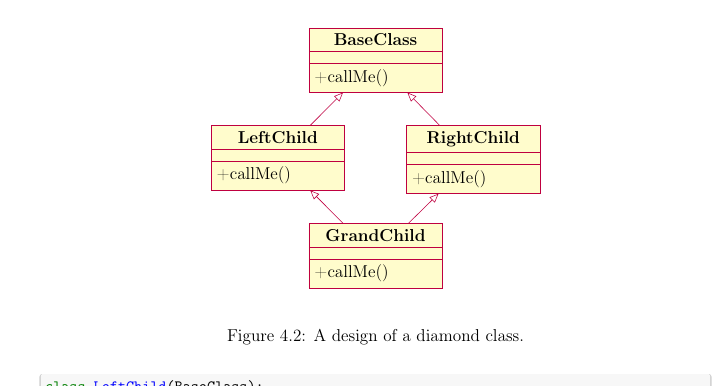

El problelma del **diamante* conste en una clase "nieto" que multihereda de dos padres (lizquierda y derecha) y ambos de hechos de un "abuelo" (herencia simple).

Como muestra el diagrama de UML arriba

In [ ]:
# base class
class BaseClass:
    countBase = 0  # contador de clased base
    def callMe(self):
        print("called from base class")
        self.countBase += 1
        return

class LeftChild(BaseClass):
    countLeft = 0 
    def callMe(self):
        BaseClass.callMe(self)
        print("called from left child")
        self.countLeft += 1
        return

class RightChild(BaseClass):
    countRight = 0 
    def callMe(self):
        BaseClass.callMe(self)
        print("called from right child")
        self.countRight += 1
        return

class GrandChild(LeftChild, RightChild):
    countGrand=0
    def callMe(self):
        LeftChild.callMe(self)
        RightChild.callMe(self)
        print("called from grand child")
        self.countGrand += 1
        return


In [ ]:
granC = GrandChild()
granC.callMe()

called from base class
called from left child
called from base class
called from right child
called from grand child


In [ ]:
vars(granC)

{'countBase': 2, 'countLeft': 1, 'countRight': 1, 'countGrand': 1}

Mediante el llamado a "super" vemos que el conteo es 1 para cada 1.

In [ ]:
# base class
class BaseClass:
    countBase = 0  # contador de clased base
    def callMe(self):
        print("called from base class")
        self.countBase += 1
        return

class LeftChild(BaseClass):
    countLeft = 0 
    def callMe(self):
        super().callMe()
        print("called from left child")
        self.countLeft += 1
        return

class RightChild(BaseClass):
    countRight = 0 
    def callMe(self):
        super().callMe()
        print("called from right child")
        self.countRight += 1
        return

class GrandChild(LeftChild, RightChild):
    countGrand=0
    def callMe(self):
        super().callMe()
        print("called from grand child")
        self.countGrand += 1
        return

In [ ]:
granC = GrandChild()
granC.callMe()
vars(granC)

called from base class
called from right child
called from left child
called from grand child


{'countBase': 1, 'countRight': 1, 'countLeft': 1, 'countGrand': 1}

Hagamos el mismo programa con letras para entender mejor el flujo de informacion

In [ ]:
# el tema se llama MRO: Multiresolution Order
class A():
    def callMe(self):
        print("A")
        return

class B(A):
    def callMe(self):
        super().callMe()
        print("B")
        return

class C(A):
    def callMe(self):
        super().callMe()
        print("C")
        return

class D(B,C):
    def callMe(self):
        super().callMe()
        print("D")
        return

In [ ]:
myD= D()
myD.callMe()

A
C
B
D


In [ ]:
help(D)

Help on class D in module __main__:

class D(B, C)
 |  Method resolution order:
 |      D
 |      B
 |      C
 |      A
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  callMe(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from A:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [ ]:
# el tema se llama MRO: Multiresolution Order
class A():
    def callMe(self):
        print("A")
        return

class B(A):
    def callMe(self):
        super().callMe()
        print("B")
        return

class C(A):
    def callMe(self):
        super().callMe()
        print("C")
        return

class D(C,B):
    def callMe(self):
        super().callMe()
        print("D")
        return

In [ ]:
myD= D()
myD.callMe()

A
B
C
D


In [ ]:
help(myD)

Help on D in module __main__ object:

class D(C, B)
 |  Method resolution order:
 |      D
 |      C
 |      B
 |      A
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  callMe(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from A:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



La herencia multiple no se aconseja en python. Si toca hacerla se hace. Java no permite la herencia multiple. El MRO puede ser complicado para algunas herencias multiples. Las notas de clase tienen un link para explicar esto.

## Polimorfismo:
Multiples formas en que se puede interpretar un objeto, o un metodo. 
En polimorfismo un metodo puede tomar distintas formas de acuerdo al contexto.
Estudiamos dos tipos de polimorfismo

* override (ya lo hemos mencionado. sobreescribir)
* overload (se uso en el proyecto de geometria)

## Override: lo vimos como ejemplo de herencia sencilla. 
Veamos otro ejemplo, el de los animales y moverse.



In [ ]:
class Animal:

    def __init__(self, name):
        self.name = name
        return

    def move(self):
        print("I am an %s , and I am moving \n"%(self.name))
        return
class Fish(Animal):

    def move(self):
        print(f"I am a {self.name} and I swim")
        return

class Snake(Animal):
    def move(self):
        print(f"I am a {self.name} and I crawl")
        return



In [ ]:
an = Animal("insecto")
an.move()

I am an insecto , and I am moving 



In [ ]:
myFish = Fish("fish")
myFish.move()

I am a fish and I swim


In [ ]:
vars(myFish)

{'name': 'fish'}

In [ ]:
mySnake = Snake("snake")
mySnake.move()

I am a snake and I crawl


## Overload:
Esta es la otra forma en que veremos polimorfiscoc. De acuerdo al context se ejectuan funciones en muchas formas. "Duck Typing". Si algo camina como un pato, nada como un pato y hace quack como un pato, es un pato. Es el contexto el que decide.

Podemos pensar en dos tipos de overload:

### Overload de funciones
El overload de funciones no funciona en Python. Y vamos a ver por que,
aunque hay trucos para simular el overload que tiene, por ejemplo, C++.

Que tal si hacemos overload para sumar 2 o 3 elementos.


In [ ]:
class Sum:

    def __init__(self):
        return

    def sum(self, x, y ):
        return x + y

    def sum(self, x, y, z):
        return x+y+z

s=Sum()
print(s.sum(2,3,4))



9


In [ ]:
print(s.sum(3,4))

TypeError: ignored

In [ ]:
help(Sum)

Help on class Sum in module __main__:

class Sum(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  sum(self, x, y, z)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [ ]:
class Sum:

    def __init__(self):
        return

    

    def sum(self, x, y, z):
        return x+y+z

    def sum(self, x, y ):
        return x + y

s=Sum()
print(s.sum(3,4))



7


In [ ]:
help(Sum)

Help on class Sum in module __main__:

class Sum(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  sum(self, x, y)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



### Overload del metodo ```__init__()``` .


In [ ]:
class Student():

    # first init
    def __init__(self):  # no tiene parametros
        self.name = "Jack"
        self.score = 0
        return


    # segundo init con la funcion que sobre-escribe
    def __init__(self, name, score):
        self.name = name
        if (score<0):
            print("score invalid. It should be a positive number")
        else:
            self.score = score

        return

st = Student()

TypeError: ignored

In [ ]:
st = Student("Oscar", 4)
st.__dict__

Como podemos arreglar este problema para considerar ambos casos.

In [ ]:
class Student2():

    
    def __init__(self, *args):  # variable arguments
        if len(args) == 0:
            self.name = "Jack"
            self.score = 0
        if len(args) == 2:
            self.name = args[0]
            if args[1] < 0 :
                print("scores should be positive")
            else:
                self.score= args[1]
            return
    
    def showData(self):
        print("name=%s, score=%d\n"%(self.name, self.score))

st = Student2()
st.showData()

name=Jack, score=0



In [ ]:
st3 = Student2("Michael", -1)

scores should be positive


In [ ]:
st3 = Student2("Michael", 4)

In [ ]:
vars(st3)

{'name': 'Michael', 'score': 4}

In [ ]:
st3.showData()

name=Michael, score=4



La otra forma de overloading es de operadores. Si usted dice $A+B$, entonces
si $A,B$ son enteros es suma de enteros. Si $A,B$ son matrices es suma matrices

In [ ]:
a=5
b=6
print(a+b)
type(a)
dir(a)
# operadores comunmente sobrecargados (overloaded):
# __add__, __ge__, __gt__, __mul__, y __sub__

11


['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'numerator',
 'real',
 'to_bytes']

In [ ]:
import numpy as np
a = np.array([[2,1], [-1,3]])
b = np.array([[0,1], [0,3]])

print(a+b)
type(a)

[[ 2  2]
 [-1  6]]


numpy.ndarray

In [ ]:
dir(a)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [ ]:
help(complex)

Help on class complex in module builtins:

class complex(object)
 |  complex(real=0, imag=0)
 |  
 |  Create a complex number from a real part and an optional imaginary part.
 |  
 |  This is equivalent to (real + imag*1j) where imag defaults to 0.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __float__(self, /)
 |      float(self)
 |  
 |  __floordiv__(self, value, /)
 |      Return self//value.
 |  
 |  __format__(...)
 |      complex.__format__() -> str
 |      
 |      Convert to a string according to format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getnewargs__(...)
 |  
 |  __gt__(self, value, /)
 | 

Ejemplos:

In [ ]:
# vamos sobrecargar la suma y producto de dos numeros complejos
# esto ya esta implementado en el sistema para el objeto "complex"
# pero lo vamos a hacer con un objeto nuevo "Complex"
class Complex:

    def __init__(self, x, y ):
        self.x = x
        self.y = y
        return

    def __add__(self, a):
        x = self.x + a.x
        y = self.y + a.y
        return (x,y)

    def __mul__(self, a):
        x = self.x*a.x - self.y*b.y  
        y = self.y*a.x  + self.x*a.y
        return(x,y)

In [ ]:
a= Complex(5,2)
b = Complex(-1,3)

print(a.__dict__)
print(b.__dict__)
print("la suma a+b es ", a+b)
print("el producto a*b es", a*b)

{'x': 5, 'y': 2}
{'x': -1, 'y': 3}
la suma a+b es  (4, 5)
el producto a*b es (-11, 13)


In [ ]:
a1 = complex(5,2)
b1 = complex(-1,3)
print("de la libreria `complex`, a1+b1=", a1 + b1)
print("de la libreria `complex`, a1*b1=", a1*b1)


de la libreria `complex`, a1+b1= (4+5j)
de la libreria `complex`, a1*b1= (-11+13j)


# Abstraccion
La palabra "abstraccion" tiene un significado muy global. Signica muchas cosas.
En OO esta en varios lugares. Cuando se define una clase se "abstraen" todos los atributos y metodos que la clase debe llevar. Pero en OO se refiere mas concretamente a la posibilidad de ocultar las cosas dificile. "Information hidding". 

## Clases abstractas (abstract classes)
Se ven como interfaces, en el sentido de que la implementacion se desarrollo externa  a la clase.

Veamos un ejemplo

In [ ]:
# importamos las librerias requeridas
from abc import ABC, abstractmethod



In [ ]:
# this is an abtract class. Implementatin is hidden

In [ ]:
# this is an abstract class. Implementation is hidden
from numpy import pi
class Solid(ABC):
    scale=5
    
    @abstractmethod
    def surfaceArea(self):
        pass
    
    @abstractmethod
    def volume(self):
        pass
    
# we create a class that descends from Solid
class Cylinder(Solid):
    
    def __init__(self, radius, height):
        self.radius=radius
        self.height=height
        
    def surfaceArea(self):
        return 2.0*pi*self.radius*self.height
    
    def volume(self):
        return pi*self.radius**2*self.height
    
    def volumeScaled(self):
        return self.scale*volume()
    
class Sphere(Solid):
    def __init__(self, radius):
        self.radius=radius
        
    def surfaceArea(self):
        return 4*pi*self.radius**2
    
    def volume(self):
        return (4/3.)*pi*self.radius**2
    
    def volumeScaled(self):
        return self.scale*self.volume()
    
    

In [ ]:
# que pasa si tratamos de instanciar una clase abstracta
# una clase con metodos abstractos no se puede instanciar
mySolid = Solid()

TypeError: ignored

In [ ]:
# instanciamos Cylinder
myCylinder = Cylinder(3, 2)
vars(myCylinder)

{'radius': 3, 'height': 2}

In [ ]:
print(myCylinder.surfaceArea())
print(myCylinder.volume())

37.69911184307752
56.548667764616276


In [ ]:
mySphere = Sphere(3)
vars(mySphere)

{'radius': 3}

In [ ]:
print(mySphere.volume())

37.69911184307752


In [ ]:
# el scale es una escala.
print(mySphere.volumeScaled())

188.49555921538757


# Comentarios y documentacion.
Python tiene la ventaja de que los comentarios se convierten en 
documentacion. A este tipo de comentarios se les llama
[Docstrings](https://en.wikipedia.org/wiki/Docstring).

Ejemplos


In [ ]:
class Car:
    ''' La clase "Car" describe algunas componentes importantes de un carro'''

    def __init__(self, brand='Nissan', model='Sentra', year='2015', engineTemperature=100):
        self.brand = brand
        self.year = year
        self.model = model
        self.__engineTemperature = engineTemperature
        return

    def temperature_plus_one(self):
        ''' la temperatura se incrementa un grado 
        segunda linea de la informacion de la funcion
        tercera linea de temperature_plus_one '''
        return self.__engineTemperature + 1

    def get_temp(self):
        ' esto muestra la temperatura '
        return self.__engineTemperature
    def set_temp(self, newtemp):
        " esto redefine la temperatura "
        self.__engineTemperature = newtemp
        return

test = Car()
print("temperature +1 =", test.temperature_plus_one())
print("brand ", test.brand)
print("model", test.model)
print("year", test.year)

# imprima temperatura antes del cambio
print("temperature antes del cambio", test.get_temp())
# luego del cambio
test.set_temp(10)
print("temperature leugo del cambio", test.get_temp())

temperature +1 = 101
brand  Nissan
model Sentra
year 2015
temperature antes del cambio 100
temperature leugo del cambio 10


In [ ]:
help(Car)

Help on class Car in module __main__:

class Car(builtins.object)
 |  Car(brand='Nissan', model='Sentra', year='2015', engineTemperature=100)
 |  
 |  La clase "Car" describe algunas componentes importantes de un carro
 |  
 |  Methods defined here:
 |  
 |  __init__(self, brand='Nissan', model='Sentra', year='2015', engineTemperature=100)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_temp(self)
 |      esto muestra la temperatura
 |  
 |  set_temp(self, newtemp)
 |      esto redefine la temperatura
 |  
 |  temperature_plus_one(self)
 |      la temperatura se incrementa un grado 
 |      segunda linea de la informacion de la funcion
 |      tercera linea de temperature_plus_one
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



Output hidden; open in https://colab.research.google.com to view.

Proxima Clase: Topicos especiales. Nuevo capitulo
# Capitulo 5 (final)


In [ ]:
``